In [19]:
import pandas as pd
import numpy as np

STORE = "MONGODB"

IN_FILE = "out.csv"

data = None

if STORE == "MONGODB":
    import pymongo
    mongo_client = pymongo.MongoClient()
    mongo_db = mongo_client.tls_survey
    mongo_docs = mongo_db.sites.find({}, {'_id': 0}) # Get all entries but not the id
    data = pd.DataFrame(list(mongo_docs))
    
elif STORE == "CSV":
    data = pd.read_csv(IN_FILE)

In [20]:
data

,answer_malformed,http_version,site,ssl_cipher
0,404IN,2,google.com,TLS_AES_256_GCM_SHA384
1,404,2,youtube.com,TLS_AES_256_GCM_SHA384
2,200,1.1,tmall.com,ECDHE-RSA-AES128-GCM-SHA256
3,200,1.1,baidu.com,ECDHE-RSA-AES128-GCM-SHA256
4,200,2,qq.com,ECDHE-RSA-AES128-GCM-SHA256
5,404IN,2,facebook.com,TLS_CHACHA20_POLY1305_SHA256
6,200,2,sohu.com,TLS_AES_256_GCM_SHA384
7,200,2,login.tmall.com,ECDHE-ECDSA-AES128-GCM-SHA256
8,200,1.1,taobao.com,ECDHE-RSA-AES128-GCM-SHA256
9,404IN,2,yahoo.com,ECDHE-RSA-AES128-GCM-SHA256


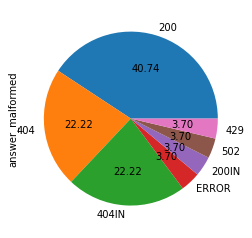

In [22]:
data["answer_malformed"].value_counts().plot.pie(autopct='%.2f');

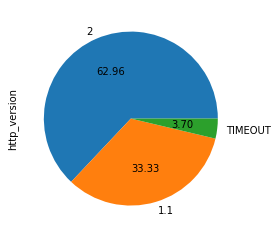

In [23]:
data["http_version"].value_counts().plot.pie(autopct='%.2f');

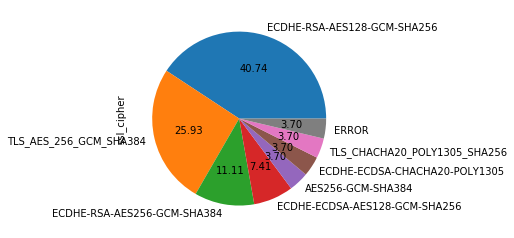

In [24]:
data["ssl_cipher"].value_counts().plot.pie(autopct='%.2f');